## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Daniella Hen Hamou 8678
# student 2: Yaakov Vidal 3642
# student 3: Iegor Kovalov 9390 
# student 4: Evyatar Tam 4960 
# (optional) student 5: Shlomi Hemo 8792 
# (optional) student 6: Daniel Fleshler 2230

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


In [3]:
train_csv = "wine_train.csv"
test_csv = "wine_test.csv"

train_path = '.' + os.sep + train_csv
test_path = '.' + os.sep + test_csv

train_data = pd.read_csv(train_path)  # Loading train-set 
test_data = pd.read_csv(test_path)  # Loading test-set

# Display the first 5 rows of each dataset
train_data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [4]:
test_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [5]:
numeric_summary = train_data.describe()
numeric_summary_df = pd.DataFrame(numeric_summary)
print("\nSummary Statistics for Numeric Features:")
numeric_summary_df


Summary Statistics for Numeric Features:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [6]:
# Convert class distribution to DataFrame
class_distribution = train_data['target'].value_counts()
class_distribution_df = pd.DataFrame(train_data['target'].value_counts())
print("\nClass Distribution:")
print(class_distribution)
class_distribution_df


Class Distribution:
target
1    57
0    48
2    37
Name: count, dtype: int64


,count
target,
1,57
0,48
2,37


In [7]:
 # Show correlations between features

corr =  train_data.corr()
corr_df = pd.DataFrame(corr)
corr_df




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


In [8]:

# Filter correlations above a threshold
threshold = 0.8
high_corr_features = corr[((corr > threshold) | (corr < -threshold)) & (corr < 1.0)]

# Drop columns with all NaN values
high_corr_features = high_corr_features.dropna(axis=1, how='all')

# Drop rows with all NaN values
high_corr_features = high_corr_features.dropna(axis=0, how='all')

# Display the resulting DataFrame
print("Highly Correlated Features:")
high_corr_features

Highly Correlated Features:


,total_phenols,flavanoids,target
total_phenols,NaN,0.869634,NaN
flavanoids,0.869634,NaN,-0.83806
target,NaN,-0.838060,NaN


<Axes: >

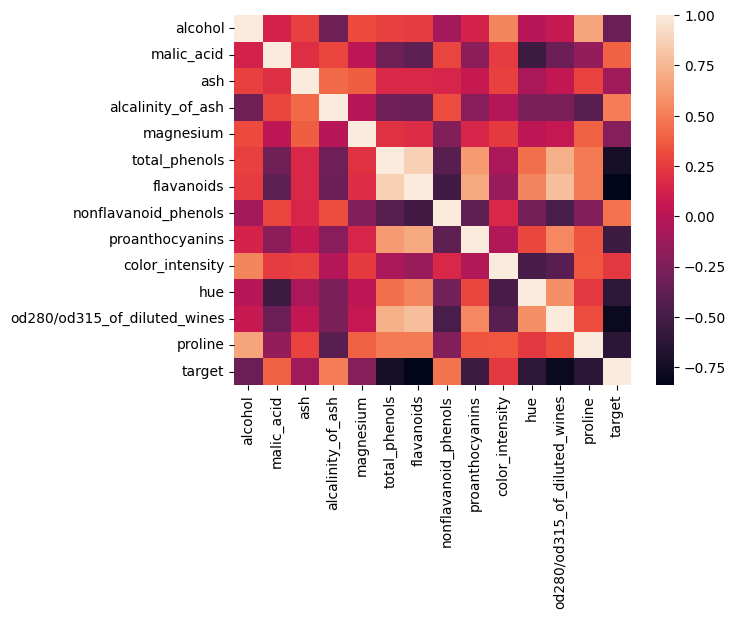

In [9]:
# Display the correlation matrix as a heatmap
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)


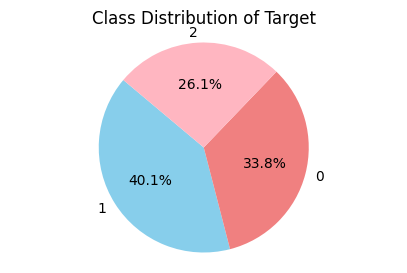

In [10]:
# Visualizations
target_distribution = train_data['target'].value_counts()

colors = ['skyblue', 'lightcoral','lightpink']

plt.figure(figsize=(5, 3))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', startangle=140 ,colors=colors)
plt.title('Class Distribution of Target')
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

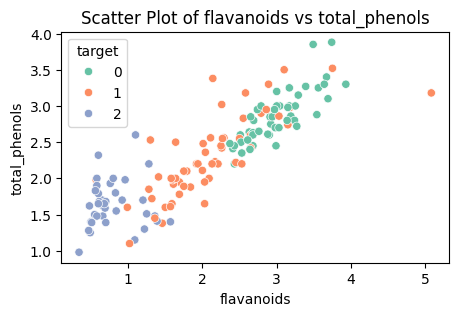

In [11]:

plt.figure(figsize=(5, 3))
sns.scatterplot(x='flavanoids', y='total_phenols', hue='target', data=train_data, palette='Set2')
plt.title('Scatter Plot of flavanoids vs total_phenols')
plt.xlabel('flavanoids')
plt.ylabel('total_phenols')
plt.show() 


/var/folders/gm/z9xp76cj59z2jgn89p4w0ss80000gn/T/ipykernel_10745/400457335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='flavanoids', data=train_data, palette='Set2')


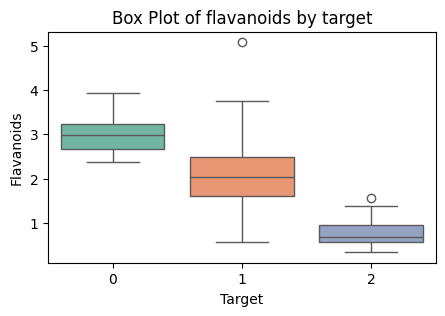

In [12]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='target', y='flavanoids', data=train_data, palette='Set2')
plt.title('Box Plot of flavanoids by target')
plt.xlabel('Target')
plt.ylabel('Flavanoids')
plt.show()

In [13]:

# Drop 'target' and 'total_phenols' columns from feature_cols
feature_cols = train_data.drop(['target', 'total_phenols'], axis=1)

# Prepare training data
X_train, X_validation, y_train, y_validation = train_test_split(feature_cols, train_data['target'], test_size=0.2, random_state=42)

In [14]:

# Define pipelines for each classifier
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # Include StandardScaler
    ('classifier', KNeighborsClassifier())  # Include KNeighborsClassifier
])

pipeline_dtc = Pipeline([
    ('scaler', StandardScaler()),  # Include StandardScaler
    ('classifier', DecisionTreeClassifier())  # Include DecisionTreeClassifier
])

pipeline_gaussian_nb = Pipeline([
    ('scaler', StandardScaler()),  # Include StandardScaler
    ('classifier', GaussianNB())  # Include GaussianNB
])

In [15]:
#Define the best hyperparameters for each model
param_grid_nb = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7],
    'classifier__priors': [None, [0.1, 0.2, 0.7], [0.3, 0.3, 0.4]]
}

param_grid_knn = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors': [3, 5, 10],
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev'],
    'classifier__algorithm': ['auto', 'brute']
}

param_grid_dtc = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth': [3, 5, 8],
    'classifier__min_samples_split': [2, 5, 10]
}

In [16]:


# Create GridSearchCV for each classifier
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_dtc = GridSearchCV(pipeline_dtc, param_grid=param_grid_dtc, cv=5, scoring='accuracy')
grid_search_gaussian_nb = GridSearchCV(pipeline_gaussian_nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')

# Fit GridSearchCV for each classifier
grid_search_knn.fit(X_train, y_train)
grid_search_dtc.fit(X_train, y_train)
grid_search_gaussian_nb.fit(X_train, y_train)


# Extract hyperparameters and scores for each model
params_nb = grid_search_gaussian_nb.cv_results_['params']
scores_nb = grid_search_gaussian_nb.cv_results_['mean_test_score']

params_knn = grid_search_knn.cv_results_['params']
scores_knn = grid_search_knn.cv_results_['mean_test_score']

params_dtc = grid_search_dtc.cv_results_['params']
scores_dtc = grid_search_dtc.cv_results_['mean_test_score']



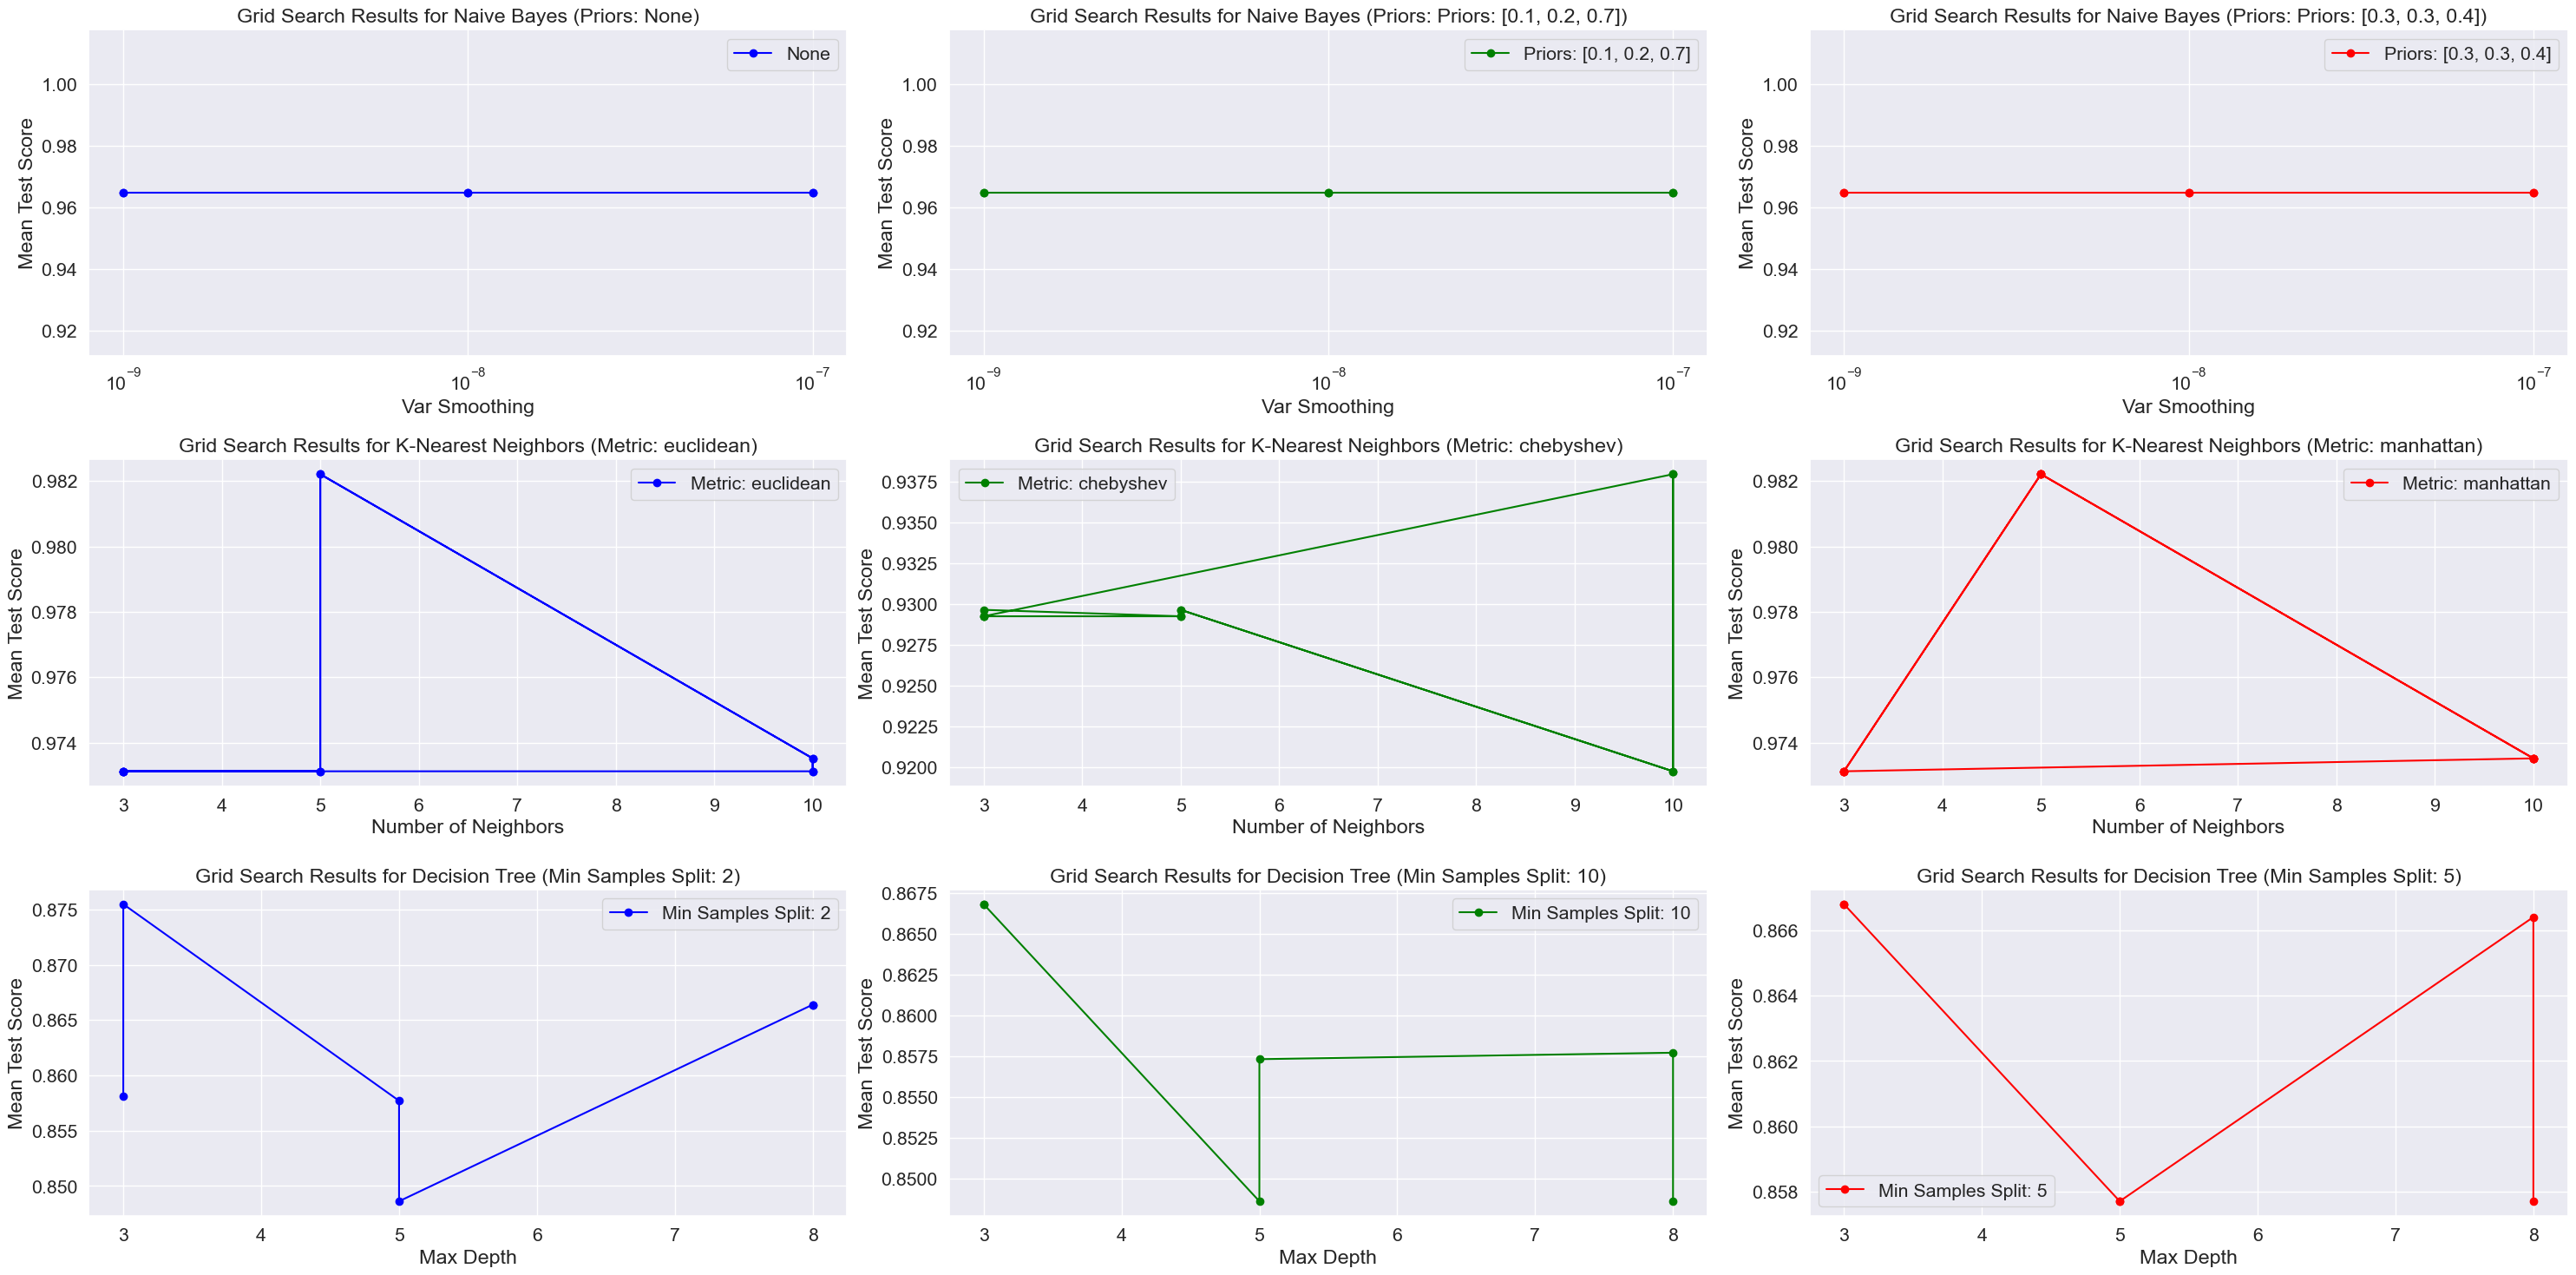

In [26]:
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(30, 15))

# Colors for the plots
colors = ['blue', 'green', 'red']

# Plot grid search results for Naive Bayes
for i, prior in enumerate([None, [0.1, 0.2, 0.7], [0.3, 0.3, 0.4]]):
    smoothing_scores = [score for param, score in zip(params_nb, scores_nb) if param['classifier__priors'] == prior]
    smoothing_params = [param['classifier__var_smoothing'] for param in params_nb if param['classifier__priors'] == prior]
    label = 'None' if prior is None else f'Priors: {prior}'
    axes[0, i].plot(smoothing_params, smoothing_scores, marker='o', label=label, color=colors[i])
    axes[0, i].set_xscale('log')
    axes[0, i].set_xlabel('Var Smoothing')
    axes[0, i].set_ylabel('Mean Test Score')
    axes[0, i].set_title(f'Grid Search Results for Naive Bayes (Priors: {label})')
    axes[0, i].legend()
    axes[0, i].grid(True)

# Plot grid search results for KNN
knn_metrics = set(param['classifier__metric'] for param in params_knn)
for i, metric in enumerate(knn_metrics):
    knn_neighbors_scores = [score for param, score in zip(params_knn, scores_knn) if param['classifier__metric'] == metric]
    knn_neighbors_params = [param['classifier__n_neighbors'] for param in params_knn if param['classifier__metric'] == metric]
    axes[1, i].plot(knn_neighbors_params, knn_neighbors_scores, marker='o', label=f'Metric: {metric}', color=colors[i])
    axes[1, i].set_xlabel('Number of Neighbors')
    axes[1, i].set_ylabel('Mean Test Score')
    axes[1, i].set_title(f'Grid Search Results for K-Nearest Neighbors (Metric: {metric})')
    axes[1, i].legend()
    axes[1, i].grid(True)

# Plot grid search results for Decision Tree
dtc_splits = set(param['classifier__min_samples_split'] for param in params_dtc)
for i, split in enumerate(dtc_splits):
    dtc_depth_scores = [score for param, score in zip(params_dtc, scores_dtc) if param['classifier__min_samples_split'] == split]
    dtc_depth_params = [param['classifier__max_depth'] for param in params_dtc if param['classifier__min_samples_split'] == split]
    axes[2, i].plot(dtc_depth_params, dtc_depth_scores, marker='o', label=f'Min Samples Split: {split}', color=colors[i])
    axes[2, i].set_xlabel('Max Depth')
    axes[2, i].set_ylabel('Mean Test Score')
    axes[2, i].set_title(f'Grid Search Results for Decision Tree (Min Samples Split: {split})')
    axes[2, i].legend()
    axes[2, i].grid(True)

plt.tight_layout()
plt.show()


In [18]:
results_data = {
    'Model': ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree'],
    'Best Parameters': [
        grid_search_gaussian_nb.best_params_,
        grid_search_knn.best_params_,
        grid_search_dtc.best_params_
    ],
    'Best Accuracy': [
        grid_search_gaussian_nb.best_score_,
        grid_search_knn.best_score_,
        grid_search_dtc.best_score_
    ]
}

# Create a DataFrame to display results
results_df = pd.DataFrame(results_data)

# Display the styled table
styled_df = results_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background', 'gray'), ('color', 'white'), ('font-family', 'Arial')]},
    {'selector': 'td', 'props': [('font-family', 'Arial'), ('color', 'black')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#f2f2f2')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background', 'white')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#ffff99')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,Model,Best Parameters,Best Accuracy
0,Naive Bayes,"{'classifier__priors': None, 'classifier__var_smoothing': 1e-09, 'scaler': StandardScaler()}",0.964822
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'scaler': MinMaxScaler()}",0.982213
2,Decision Tree,"{'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'scaler': MinMaxScaler()}",0.875494


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [19]:
#implementing the best model on the train set.

# Prepare training data
X_flow_train = train_data.drop(['target', 'total_phenols'], axis=1)
y_flow_train = train_data['target']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
X_flow_train_scaled = scaler.fit_transform(X_flow_train)

# Initialize and train the KNeighborsClassifier with the best hyperparameters
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='auto')
model.fit(X_flow_train_scaled, y_flow_train)

KNeighborsClassifier(metric='euclidean')

## Part 4 - Apply on test and show model performance estimation

Accuracy: 0.9722222222222222


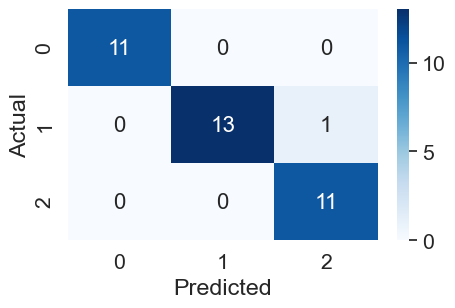

In [20]:
# Predict the target values
X_flow_test = test_data.drop(['target', 'total_phenols'], axis=1)
y_flow_test = test_data['target']

# Scale the test features
X_flow_test_scaled = scaler.transform(X_flow_test)

# Make predictions
y_final_pred = model.predict(X_flow_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_flow_test, y_final_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_flow_test, y_final_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=np.unique(y_flow_test), index=np.unique(y_flow_test))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16})  # font size
plt.show()
